<a href="https://colab.research.google.com/github/gulamkibria775/Data_science_project/blob/main/Data_science_project%20/Deep_learning/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:12<00:00, 187MB/s]
100% 1.06G/1.06G [00:12<00:00, 90.8MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label


In [12]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [21]:
#create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1,activation='sigmoid'))


In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.2556 - accuracy: 0.6087 - val_loss: 0.6170 - val_accuracy: 0.6620
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5646 - accuracy: 0.7096 - val_loss: 0.4983 - val_accuracy: 0.7598
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4887 - accuracy: 0.7689 - val_loss: 0.4884 - val_accuracy: 0.7532
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4464 - accuracy: 0.7977 - val_loss: 0.4848 - val_accuracy: 0.7582
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3616 - accuracy: 0.8371 - val_loss: 0.4176 - val_accuracy: 0.8074
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2849 - accuracy: 0.8766 - val_loss: 0.4722 - val_accuracy: 0.8170
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1978 - accuracy: 0.9183 - val_loss: 0.6728 - val_ac

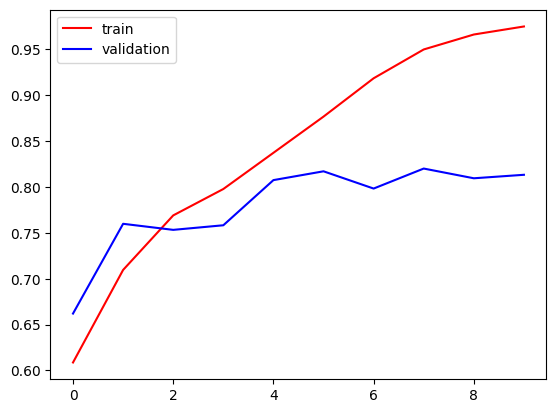

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

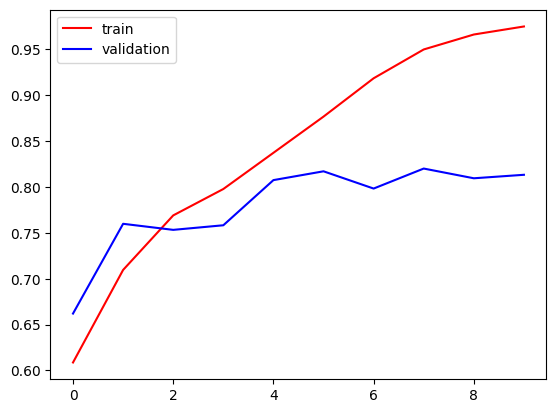

In [26]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


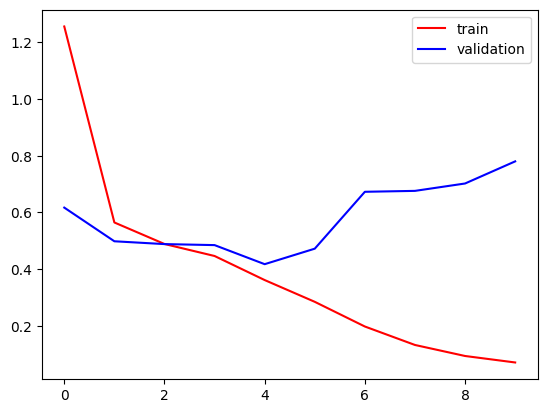

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

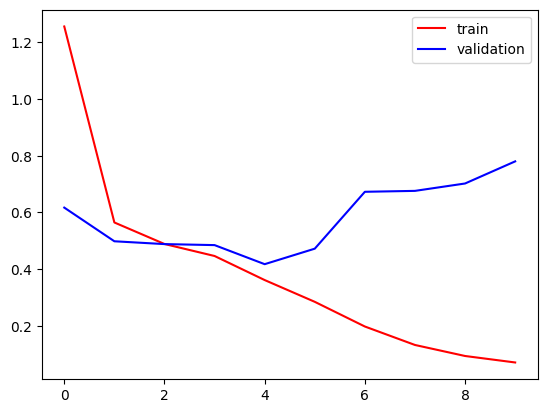

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [46]:
pip install opencv-python

In [48]:
import cv2

In [51]:
from google.colab.patches import cv2_imshow

In [105]:
test_img = cv2.imread('/content/test/dogs/dog.1471.jpg')

In [ ]:
print(test_img)

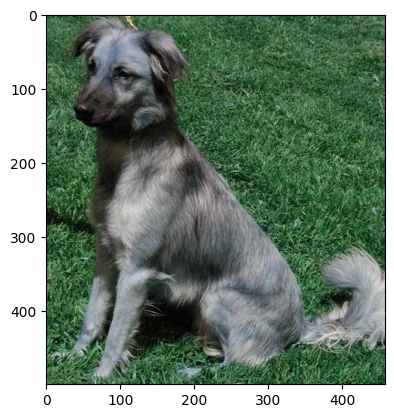

In [106]:
plt.imshow(test_img)

In [107]:
test_img.shape

(500, 458, 3)

In [108]:
test_img=cv2.resize(test_img,(256,256))

In [109]:
test_input=test_img.reshape((1,256,256,3))

In [110]:
out_put=model.predict(test_input)



1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [103]:
print(out_put[0][0])


0.0


In [96]:
if out_put[0][0] != 0:
    print('.................Dog.................')
else:
    print("...............Cat.................")



...............Cat.................
